## Неделя 2. Среда
### Обучение с учителем
#### Базовые метрики в библиотеке `sklearn`

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
plt.rcParams['figure.dpi'] = 100
plt.style.use('ggplot')

In [2]:
from sklearn.datasets import load_breast_cancer

### Задача бинарной классификации

In [5]:
# Загрузим данные и таргет

X = load_breast_cancer()['data']
y = load_breast_cancer()['target']

In [7]:
# Разделим датасет на обучающую и валидационную выборки

x_train, x_valid, y_train, y_valid = train_test_split(X, y)

In [8]:
# Прооверим размеры 

x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((426, 30), (426,), (143, 30), (143,))

In [9]:
# Создадим два классификатора и сравним их эффективность

lr = LogisticRegression(max_iter=10000)
kn = KNeighborsClassifier(1)

In [10]:
# Обучаем

lr.fit(x_train, y_train)
kn.fit(x_train, y_train);

In [15]:
# Сделаем предсказания на валидации и сохраним вероятности принадлежности объектов к классу 1

y_pred_lr_probs = lr.predict_proba(x_valid)[:, 1]
y_pred_kn_probs = kn.predict_proba(x_valid)[:, 1]

In [19]:
# Вычислим и распечатаем ROC_AUC

auc_lr = roc_auc_score(y_valid, y_pred_lr_probs)
auc_kn = roc_auc_score(y_valid, y_pred_kn_probs)

print(f'AUC for LogReg: {auc_lr:.4f}')
print(f'AUC for KNN: {auc_kn:.4f}')

AUC for LogReg: 0.9991
AUC for KNN: 0.9238


In [20]:
fpr_lr, tpr_lr, t = roc_curve(y_valid, y_pred_lr_probs)
fpr_kn, tpr_kn, t = roc_curve(y_valid, y_pred_kn_probs)

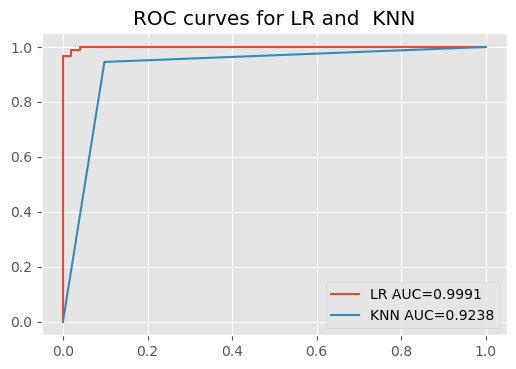

In [21]:
plt.plot(fpr_lr, tpr_lr, label=f'LR AUC={auc_lr:.4f}')
plt.plot(fpr_kn, tpr_kn, label=f'KNN AUC={auc_kn:.4f}')
plt.title('ROC curves for LR and  KNN')
plt.legend()

In [24]:
y_pred_lr_labels = lr.predict(x_valid)
y_pred_kn_labels = kn.predict(x_valid)

In [25]:
import seaborn as sns

<AxesSubplot:>

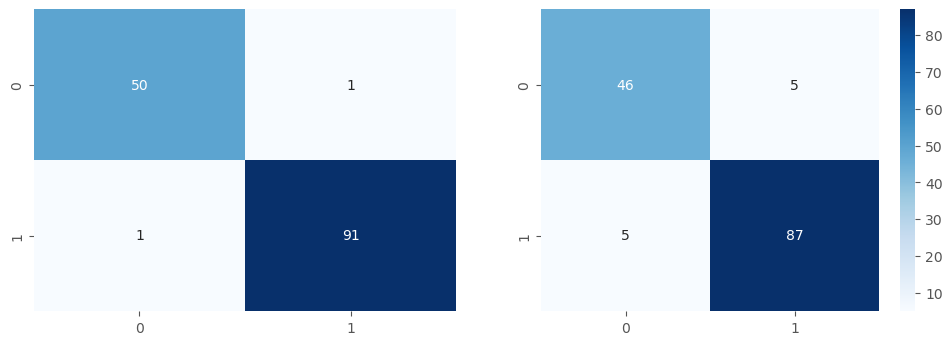

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_valid, y_pred_lr_labels), ax=ax[0], annot=True, cmap='Blues', cbar=False)
sns.heatmap(confusion_matrix(y_valid, y_pred_kn_labels), ax=ax[1], annot=True, cmap='Blues')

<AxesSubplot:title={'center':'KNN report'}>

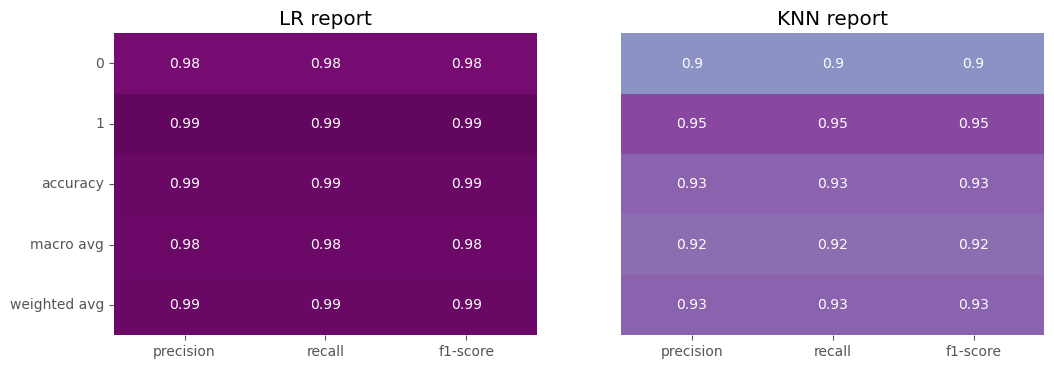

In [27]:
clf_rep_kn = classification_report(y_valid, y_pred_kn_labels, output_dict=True)
clf_rep_lr = classification_report(y_valid, y_pred_lr_labels, output_dict=True)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_title('LR report')
sns.heatmap(pd.DataFrame(clf_rep_lr).iloc[:-1, :].T, 
            annot=True, 
            vmax=1, 
            vmin=0.8, 
            cmap='BuPu', 
            ax=ax[0], 
            cbar=False)

ax[1].set_title('KNN report')
sns.heatmap(pd.DataFrame(clf_rep_kn).iloc[:-1, :].T, 
            annot=True, 
            vmax=1, 
            vmin=0.8, 
            cmap='BuPu', 
            ax=ax[1], 
            yticklabels=False, 
            cbar=False)

In [16]:
(0.9+0.97 ) / 2

0.935

## Задача регрессии

In [28]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [33]:
X, y = load_diabetes()['data'], load_diabetes()['target']

In [34]:
x_train, x_valid, y_train, y_valid = train_test_split(X, y)

In [35]:
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((331, 10), (331,), (111, 10), (111,))

In [36]:
lr = LinearRegression()
kn = KNeighborsRegressor()

In [37]:
lr_preds = lr.fit(x_train, y_train).predict(x_valid)
kn_preds = kn.fit(x_train, y_train).predict(x_valid)

In [38]:
print(f'MSE of LR: {mean_squared_error(y_valid, lr_preds)}')
print(f'MSE of KNN: {mean_squared_error(y_valid, kn_preds)}')

MSE of LR: 2529.667109293965
MSE of KNN: 2786.8612612612615


In [39]:
np.sqrt(2529)

50.28916384272063

In [44]:
print(f'RMSE of LR: {mean_squared_error(y_valid, lr_preds, squared=False)}')
print(f'RMSE of KNN: {mean_squared_error(y_valid, kn_preds, squared=False)}')

RMSE of LR: 50.295796139378936
RMSE of KNN: 52.79073082711833


In [45]:
print(f'MAE of LR: {mean_absolute_error(y_valid, lr_preds)}')
print(f'MAE of KNN: {mean_absolute_error(y_valid, kn_preds)}')

MAE of LR: 39.39670228111822
MAE of KNN: 41.336936936936944


$$\text{MAPE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \frac{{}\left| y_i - \hat{y}_i \right|}{max(\epsilon, \left| y_i \right|)}$$

In [46]:
print(f'MAPE of LR: {mean_absolute_percentage_error(y_valid, lr_preds)*100:.2f}')
print(f'MAPE of KNN: {mean_absolute_percentage_error(y_valid, kn_preds)*100:.2f}')

MAPE of LR: 39.45
MAPE of KNN: 39.32


In [47]:
# Задаем SMAPE

def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

In [48]:
print(f'SMAPE of LR: {smape(y_valid, lr_preds):.2f}')
print(f'SMAPE of KNN: {smape(y_valid, kn_preds):.2f}')

SMAPE of LR: 29.40
SMAPE of KNN: 31.33


In [49]:
y_range = np.arange(120, 200)
y_fixed = np.array([y.mean()] * len(y_range))

In [50]:
y_range.shape, y_fixed.shape

((80,), (80,))

In [51]:
def mse(x, y):
    return (x-y)**2

def mae(x, y): 
    return np.abs(x - y)

def mape(x, y):
    return (abs(x-y)/x*100)

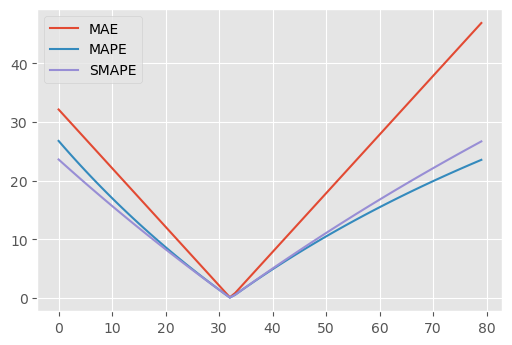

In [52]:
plt.plot([mae(x, y_fixed[0]) for x in y_range], label='MAE')
plt.plot([mape(x, y_fixed[0]) for x in y_range], label='MAPE')
plt.plot([smape([x], y_fixed[0]) for x in y_range], label='SMAPE')
plt.legend()

[](https://wikimedia.org/api/rest_v1/media/math/render/svg/f3a624512e6d1a1891047bec373c4010a9d33941)

$0.5(y - \hat{y})^2$ for $|y - \hat{y}| \leq \delta$

$\delta(|y - \hat{y}|) - 0.5\delta)$

In [53]:
def huber_loss(x, y, delta=2):
    if np.abs(x - y) < delta:
        return .5 * (x - y)**2
    else:
        return delta*(np.abs(x - y) - .5*delta)

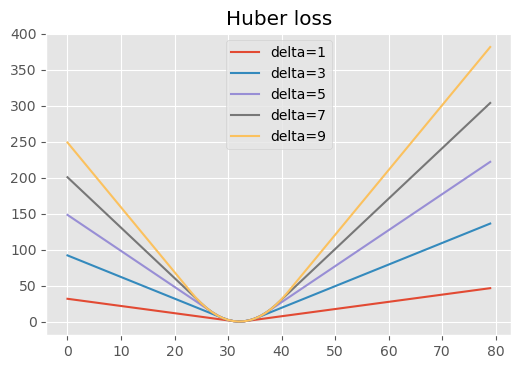

In [54]:
for i in np.arange(1, 10, 2):
    plt.plot([huber_loss([x], y_fixed[0], i) for x in y_range], label=f'delta={i}')
plt.title('Huber loss')
plt.legend()